In [125]:
# Building a Neural network for digit classification with the MNIST dataset.

# a. there will be 1 input layer, 1 hidden layer, and 1 output layer.
# b. when connecting the input to the hidden layer, I will add a weight to each input, and a bias to the layer, that will perform a "partial linear regression", as I understand, but also, I will need to use, 
# from the 1 hidden layer on, acivation functions that take as input the values from the output from adding the weights and biases. So that we have a compostition of 2 functions, these activations functinos will 
# be ReLU and Sigmoid. I can search them to understand how they work and their use cases, why are they applicable for the MNIST.
# c. I will have to perform forward and backward propagation in order to train the network, algorithms that I will be building from zero, also, coding the gradient descent algorithm from scratch.
# d. After training the model, I will try to achieve an accuracy of more than 84%, which was the maximum accuracy that the guy from the video obtained.

In [126]:
# Steps for coding
# 1. Forward propagation
# 2. Backpropagation
# 3. Gradient Descent

In [127]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Importing the data and previewing it.
data = pd.read_csv("train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
# we want to transform this data into an array of data 
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_, m_train = X_train.shape

In [129]:
# writing the functions to use in the main steps for the NN later
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

# Rectified Linear Unit activation function
def ReLU(Z):
    return np.maximum(0, Z)

# the activation function that points to the output layer.
# I feel that the idea behind it is to condense the information of the NN 
# into the 10 categories of possible outputs, assigning each one a prob.
def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))

# forward propagation algorithm
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

# one-hot encode is a manipulation that creates a matrix and
# stores the information of anything into that matrix, its purpose is to
# set an evoriment for the output that's designed for classification.
# At least that's how I understand it for now.
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

# derivative of ReLU activ. function, as I understand it, it is 
# a process from the chain rule
def deriv_ReLU(Z):
    return Z > 0

# backward propagation algorithm
def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return  dW1, db1, dW2, db2

# this is the core of gradient descent
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

# real-time feedback
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [130]:
def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 25 == 0:
            print(f"Iteration: {i}")
            predictions = get_predictions(A2)
            print(f"Accuracy: {get_accuracy(predictions, Y)}")
    return W1, b1, W2, b2

In [131]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 501, 0.20)
# W1, b1, W2, b2 = gradient_descent(X_dev, Y_dev, 1000, 0.1)

Iteration: 0
[7 3 7 ... 7 7 4] [4 6 7 ... 0 2 8]
Accuracy: 0.09839024390243903
Iteration: 25
[4 6 2 ... 0 3 8] [4 6 7 ... 0 2 8]
Accuracy: 0.5260731707317073
Iteration: 50
[4 6 2 ... 0 3 8] [4 6 7 ... 0 2 8]
Accuracy: 0.6970731707317073
Iteration: 75
[4 6 2 ... 0 3 8] [4 6 7 ... 0 2 8]
Accuracy: 0.762
Iteration: 100
[4 6 2 ... 0 3 8] [4 6 7 ... 0 2 8]
Accuracy: 0.7983170731707318
Iteration: 125
[4 6 2 ... 0 3 8] [4 6 7 ... 0 2 8]
Accuracy: 0.8218536585365853
Iteration: 150
[4 6 2 ... 0 3 8] [4 6 7 ... 0 2 8]
Accuracy: 0.8373414634146341
Iteration: 175
[4 6 7 ... 0 3 8] [4 6 7 ... 0 2 8]
Accuracy: 0.8481951219512195
Iteration: 200
[4 6 7 ... 0 3 8] [4 6 7 ... 0 2 8]
Accuracy: 0.8552926829268293
Iteration: 225
[4 6 7 ... 0 3 8] [4 6 7 ... 0 2 8]
Accuracy: 0.8618780487804878
Iteration: 250
[4 6 7 ... 0 3 8] [4 6 7 ... 0 2 8]
Accuracy: 0.8664634146341463
Iteration: 275
[4 6 7 ... 0 3 8] [4 6 7 ... 0 2 8]
Accuracy: 0.8698536585365854
Iteration: 300
[4 6 7 ... 0 2 8] [4 6 7 ... 0 2 8]
Accura

In [134]:
# This are the descended weights and biases.

# Now these are functions to observe individual predictions based on the trained weights 
# and biases of our current neural network.
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:,index, None]
    prediction = make_predictions(X_train[:,index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print(f"Prediction: {prediction}")
    print(f"Label: {label}")

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation = "nearest")
    plt.show()

Prediction: [4]
Label: 4


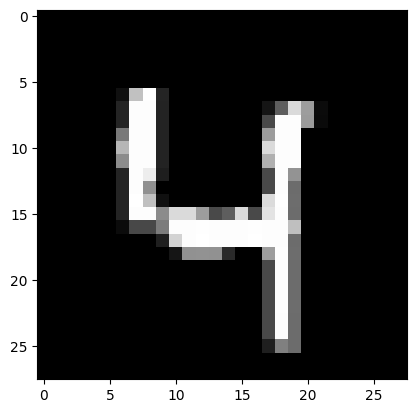

Prediction: [6]
Label: 6


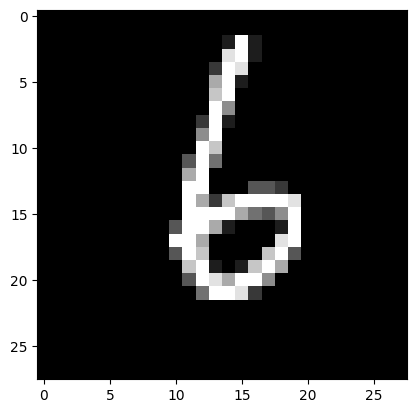

Prediction: [7]
Label: 7


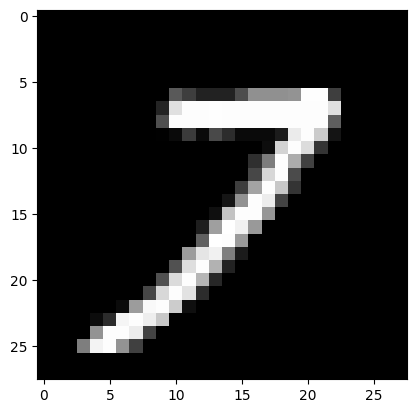

Prediction: [5]
Label: 5


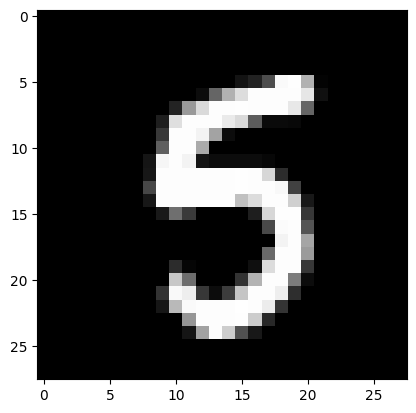

In [136]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [137]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[9 1 3 2 7 3 1 5 3 1 3 7 2 7 0 3 6 1 2 0 5 9 9 6 8 8 2 5 8 7 4 6 9 4 1 4 1
 1 9 3 4 9 2 2 7 8 0 1 8 0 4 8 1 0 7 1 2 1 1 4 4 8 7 8 4 0 7 6 5 4 6 6 2 5
 6 3 9 9 4 7 3 5 0 0 7 8 5 3 5 7 4 2 0 1 1 3 9 1 5 6 0 8 2 8 1 9 2 2 1 5 4
 8 5 0 2 4 5 8 5 8 2 4 8 0 4 1 4 7 5 0 8 5 4 0 8 9 9 6 3 7 7 3 7 6 8 5 1 7
 9 1 4 9 7 6 2 9 1 3 6 7 1 9 6 0 4 8 5 5 8 6 6 8 8 6 7 0 2 9 6 2 1 9 6 0 7
 7 1 5 2 7 7 9 0 9 6 8 5 3 1 2 0 9 9 0 4 2 3 1 0 3 0 9 0 6 3 8 2 3 9 4 2 4
 4 1 4 3 8 0 9 2 5 6 0 5 3 7 7 3 0 2 7 9 1 8 0 3 4 9 3 6 9 5 5 0 8 2 6 3 2
 2 4 3 3 1 2 3 1 4 6 3 3 1 9 8 6 9 1 8 8 1 8 9 3 8 4 5 7 7 8 1 9 4 0 8 6 6
 4 5 6 4 6 0 1 2 9 4 8 8 2 2 5 8 7 1 4 5 9 1 1 3 4 0 1 9 1 3 5 7 4 8 1 6 9
 7 9 2 4 7 7 5 9 9 1 6 2 0 0 2 2 1 4 1 9 9 4 5 8 7 8 4 4 4 4 7 1 6 9 4 1 2
 8 9 2 6 8 4 8 1 1 3 2 2 5 4 1 7 2 4 4 6 4 8 3 1 3 1 3 8 9 3 3 7 7 2 2 6 1
 3 1 0 6 9 1 1 2 7 7 1 2 0 3 3 9 9 6 3 9 2 8 7 2 1 8 5 6 6 5 6 0 8 7 7 1 5
 0 7 7 4 6 3 2 6 2 8 3 5 0 5 3 6 5 1 5 4 3 0 3 3 6 1 8 0 9 9 2 8 1 3 3 8 7
 7 3 8 0 9 1 7 7 2 5 9 1 

0.892

In [146]:
W1.shape, b1.shape, W2.shape, b2.shape

((10, 784), (10, 1), (10, 10), (10, 1))